In [ ]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

from IPython.core.display import clear_output
clear_output()

In [ ]:
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 18})

# **Short Selling**

**Short selling (also known as shorting) is a strategy where an investor sells an asset with the intention of purchasing the asset at a lower price.**

**Because a short seller does not own the asset they are selling they need to borrow the asset, most likely from a broker. The broker will go to their client base and find an investor that owns the asset that is willing to lend it for the short sale. The brokerage client is compensated for lending their asset by the short seller who must pay a short interest margin. The short seller also needs to compensate the lender for any dividends/premiums paid by the asset.**

**In order to enter a short sale an investor requires a margin account. A margin account is a brokerage account where a broker can lend cash or securities to a customer at a given margin rate. Because short sellers do not own the asset they are shorting, they must post margin requirements (collateral) against a certain percentage of the principal being shorted.**

**Short sellers speculating on the decline of a stock typically only hold the position for a short period of time because the short interest margin can be costly. Short sellers tend to short around a specific event that can cause the price of a stock to drop, such as an earning announcement or FDA results of a company's drug.**

$\text{Net Profit of a Short Sale = $P_t$ - $P_{t+n}$ - $TR$ - $D$}$

$\text{Where: $P$ is the value of the asset, $t$ is the day the short sale is initiated, $n$ is the duration the short sale is held before it is closed,}$
$\text{$TR$ are the transaction costs and $D$ are dividends paid during the period where the shares were shorted}$

<sup><sup/>
Source: [Short](https://www.investopedia.com/terms/s/short.asp) from Investopedia.com by James Chen

<sup><sup/>
Source: [Why Do You Need a Margin Account to Short Sell Stocks?](https://www.investopedia.com/ask/answers/05/marginaccountshortsell.asp) from Investopedia.com by Chad Langager



## **Simplified Short Sale Example**

**A hedge fund manager forecasts that a tech company's earnings call will cause the share price of the company to fall. The manager takes a short position in the stock. The next day the earnings call causes the stock price to crash and the manager closes the position by buying back the stock at a lower price. In this simplified scenario we will ignore margin requirements.**

In [ ]:
num_shares = int(input('Enter the number of shares being shorted\n'))
price_before_call = float(input('Enter the price of the stock before the earnings call\n'))
price_after_call = float(input('Enter the price of the stock after the earnings call\n'))
days_short_held = int(input('Enter the number of days the short position was held\n'))
margin_rate = float(input('Enter the annualized short interest margin rate\n'))
dividends = float(input('Enter dividends paid per share during the short period\n'))

margin_cost = ((price_before_call * margin_rate) * (days_short_held/365)) * num_shares
net_profit = (price_before_call - price_after_call - dividends) * num_shares - margin_cost
holding_period_return = net_profit/(price_before_call*num_shares)

print(f'The net profit of the short sale is: ${net_profit:,.2f}\nThe short interest charged for the short sale is: ${margin_cost:,.2f}\nThe holding period return is: {holding_period_return:.2%}')

Enter the number of shares being shorted
1000
Enter the price of the stock before the earnings call
150
Enter the price of the stock after the earnings call
120
Enter the number of days the short position was held
2
Enter the annualized short interest margin rate
.05
Enter dividends paid per share during the short period
1
The net profit of the short sale is: $28,958.90
The short interest charged for the short sale is: $41.10
The holding period return is: 19.31%


# **Short Position**

**A short position is similar to a short sale where the value of the position increases as the price of the asset decreases. However short positions are taken in derivatives contracts, meaning no asset needs to be lent in order for an investor to initiate it.**

**Individual investors can access the derivatives markets through brokers who can match an investor that wants to take a short position to a buyer who will take a long position.**

**Short positions in derivatives contracts are often used to insure an existing position in a portfolio. For example if a manager wants to hedge their S&P 500 ETF position they can short S&P 500 Index futures to hedge their risk.**

<sup><sup/>
Source: [What is the difference between a short position and a short sale?](https://www.investopedia.com/ask/answers/012715/what-difference-between-short-position-and-short-sale.asp) from Investopedia.com

## **Simplified Short Futures Position Example**

**An analyst for a hedge fund forecasts that the tech sector will be negatively affected by rising inflation and poor earnings calls. The analyst proposes that fund should take a short position in NASDAQ-100 E-mini futures. Within their margin account the fund must post an initial margin, a specified amount of cash used as collateral if the position moves against the fund. If the value of the margin account falls bellow the maintenance margin set by the broker, the hedge fund must add more cash to the maintenance account. Below are the specific requirements to trade the futures:**

- **Current NASDAQ-100 Index Value: 11907.25**

- **Tick Size (miniminum movement for the index): 0.25**

- **Contract Unit: \$20 $\times$ NASDAQ-100 Index Value**

- **Ininital Margin: $17,050**

- **Maintenance Margin: $15,500**

In [ ]:
nasdaq = 11907.25
initial_margin = 17050
maintenance_margin = 15500
margin_account = 17050
cash_account = 20000
multiplier = 20

def step(num, tick_size):
    return round(float(num) / tick_size) * tick_size


account_history = [margin_account]
nasdaq_history = [nasdaq]
margin_calls = []

for iteration in range(50):
  nasdaq_move = step(np.random.normal(0,60),0.25)
  margin_account -= nasdaq_move * multiplier
  nasdaq += nasdaq_move
  nasdaq_history.append(nasdaq)
  if margin_account < maintenance_margin:
    add_funds = initial_margin - margin_account
    if cash_account > add_funds:
      cash_account -= add_funds
      margin_account += add_funds
      account_history.append(margin_account)
      margin_calls.append([add_funds,iteration])
    else:
      print('The cash account is out of funds')
      break
  else:
    account_history.append(margin_account)

<sup><sup/>
Source: [Step function](https://stackoverflow.com/questions/7859147/round-in-numpy-to-nearest-step) from Stack Overflow by Ruggero Turra

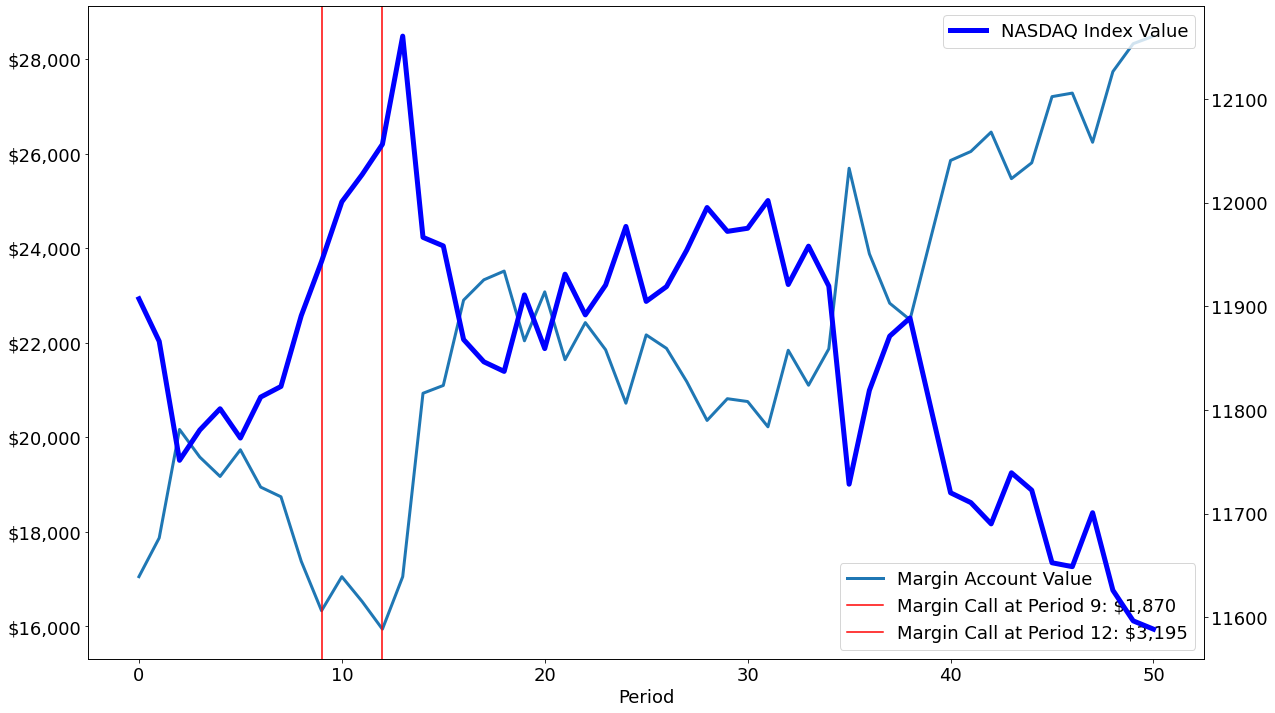

In [ ]:
fig_1, ax_1 = plt.subplots(1, 1)

ax_1.plot(account_history, linewidth = 3, label = 'Margin Account Value')

for call in margin_calls:
  ax_1.axvline(call[1], color = 'red', label = f'Margin Call at Period {call[1]}: ${call[0]:,.0f}')

ax_nasdaq = ax_1.twinx()
ax_nasdaq.plot(nasdaq_history, color = 'blue', linewidth = 5, label = 'NASDAQ Index Value')

ax_1.set_xlabel('Period')
tick = mtick.StrMethodFormatter('${x:,.0f}')
ax_1.yaxis.set_major_formatter(tick)
ax_1.legend()
ax_nasdaq.legend();

## **Downside Risk of Short Selling**

**The potential profit/loss profile of a short position is the opposite of a long position. For a long position on an asset there is unlimited upside but the downside is limited to the principal invested in the asset, meaning you cannot lose more money than you put in. However for a short position the potential loss is unlimited and the upside is limited to the price at which the asset was borrowed at. This asymmetry of returns makes shorting a less attractive investment option relative to holding a long position on an asset.**

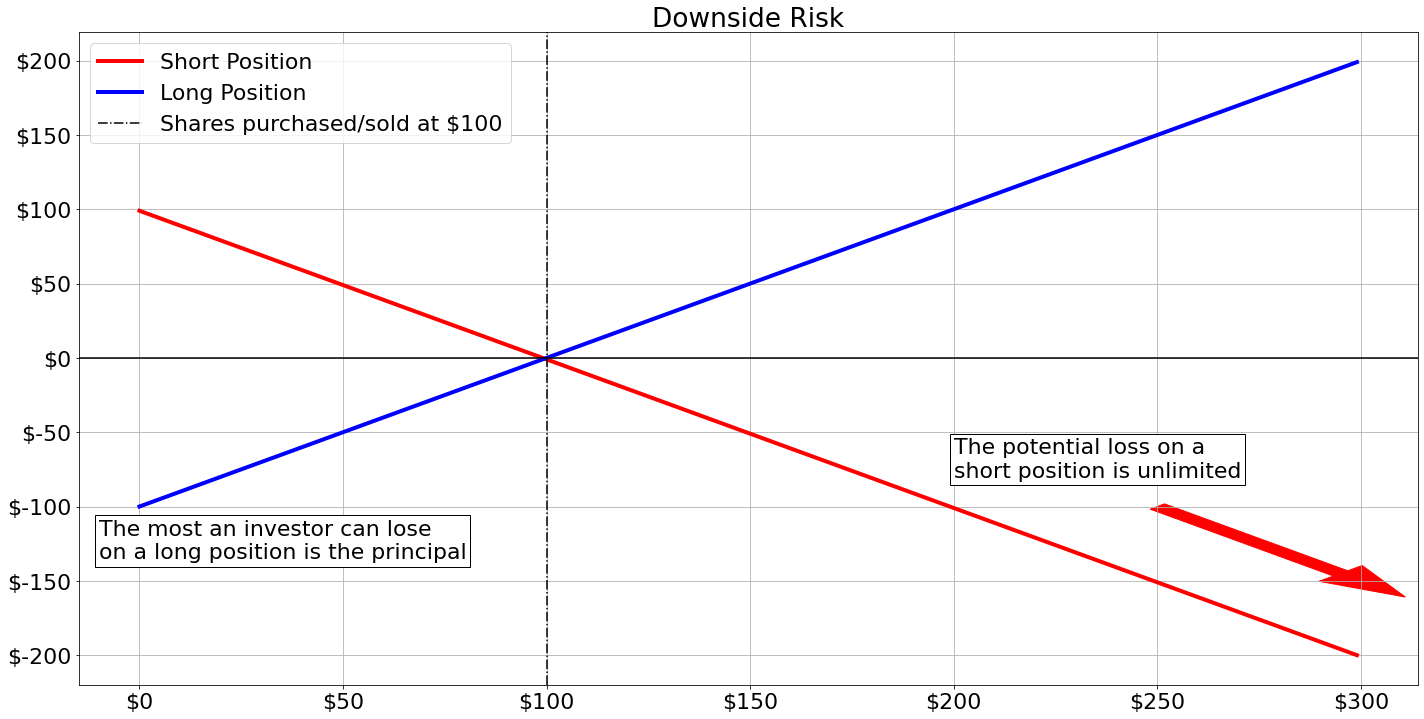

In [ ]:
short_position = [num for num in range(-200,100)]
short_position.reverse()

fig_2, ax_2 = plt.subplots(1, 1)

ax_2.plot(range(0,300),short_position,linewidth=4,color='red',label='Short Position',)
ax_2.text(200,-80,'The potential loss on a\nshort position is unlimited',bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

ax_2.plot(range(0,300),range(-100,200),linewidth=4,color='blue',label='Long Position')
ax_2.text(-10,-135,'The most an investor can lose\non a long position is the principal',bbox=dict(facecolor='white', alpha=1, edgecolor='black'))
ax_2.arrow(250,-100,45,-45,color='red',width=5)

ax_2.yaxis.set_major_formatter(tick)
ax_2.xaxis.set_major_formatter(tick)
ax_2.axhline(0,color='black')
ax_2.axvline(100,color='black',linestyle='-.',label='Shares purchased/sold at $100')
ax_2.grid()
ax_2.legend()
ax_2.set_title('Downside Risk');

# **Short Selling Case Study: GameStop**

**As bricks-and-mortar retailers struggled with falling revenues and profits, hedge funds began short selling the stocks of these retailers. One of the most shorted stocks was GameStop, a retailer with stores across the US that was struggling with declining sales as digital competitors like Steam grabbed a larger portion of the video game sale market.**

**The Short Interest Ratio provides a measure of how shorted a stock is. The ratio is computed by taking the number of shares sold short divided by the average daily trading volume. A stock is considered to be highly shorted if its SI ratio is around 25-40%. In January of 2021 GameStop's SI was between 100-140%, meaning shares were lent multiple times to be sold short.**

**Retail investors from the subreddit r/wallstreetbets noticed how significantly shorted GameStop's stock was. The members of the forum began purchasing GameStop shares. Other investors such started purchasing shares as well causing a short squeeze. A short squeeze occurs when a heavily shorted stock rises in price, causing losses for short sellers who must either close their position or post more funds in order to keep their short.**

**From its lows of 2020, GameStop's shares rose over 10,000% causing massive losses for short sellers. Hedge fund manager Melvin Capital's portfolio reportedly lost 53% of its value in January 2021 because of a short position in GameStop. Eventually Melvin Capital closed down and returned all the external money managed back to investors.**

<sup><sup/>
Source: [GameStop short sellers are still not surrendering despite nearly $20 billion in losses this month](https://www.cnbc.com/2021/01/29/gamestop-short-sellers-are-still-not-surrendering-despite-nearly-20-billion-in-losses-this-year.html) by Yun Li from CNBC.com

<sup><sup/>
Source: [Short interest in GameStop declined to 15% vs 141% at peak - S3](https://www.reuters.com/article/us-retail-trading-gamestop-short/short-interest-in-gamestop-declined-to-15-vs-141-at-peak-s3-idUSKBN2BG28H) from Reuters.com

<sup><sup/>
Source: [Melvin Capital, hedge fund torpedoed by the GameStop frenzy, is shutting down](https://www.nytimes.com/2022/05/18/business/melvin-capital-gamestop-short.html) from The New York Times by Matthew Goldstein and Kate Kelly

<sup><sup/>
Source: [Short Squeeze](https://www.investopedia.com/terms/s/shortsqueeze.asp) from Investopedia.com by Cory Mitchell

<sup><sup/>
Source: [Short Interest Ratio](https://www.investopedia.com/terms/s/shortinterestratio.asp) from Investopedia.com by James Chen

In [ ]:
gme = yf.Ticker('GME')
gme_history = gme.history(start = '2020-01-01',end = '2021-04-30')

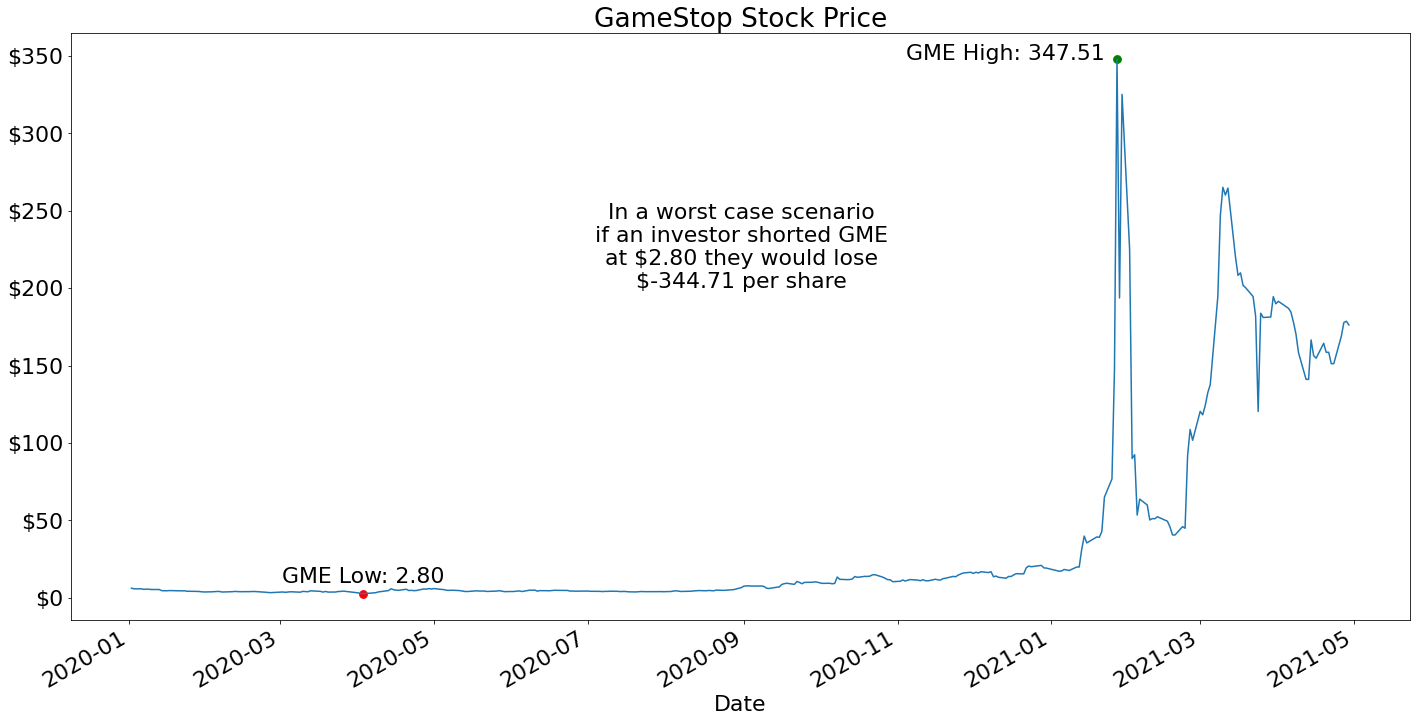

In [ ]:
fig_3, ax_3 = plt.subplots(1, 1)

gme_high = gme_history['Close'].max()
gme_low = gme_history['Close'].min()
gme_history['Close'].plot()
ax_3.scatter(gme_history['Close'].idxmin(),gme_history['Close'].min(),color='red',s=60)
ax_3.scatter(gme_history['Close'].idxmax(),gme_history['Close'].max(),color='green',s=60)
ax_3.yaxis.set_major_formatter(tick)
ax_3.text(gme_history['Close'].idxmax() - pd.Timedelta(days=5),gme_history['Close'].max(),f'GME High: {gme_high:.2f}',ha='right')
ax_3.text(gme_history['Close'].idxmin(),gme_history['Close'].min()+7,f'GME Low: {gme_low:.2f}',ha='center')
median_series_idx = int(len(gme_history['Close'].index)/2)
ax_3.text(gme_history['Close'].index[median_series_idx],200,ha='center',
          s=f'In a worst case scenario\nif an investor shorted GME\nat ${gme_low:.2f} they would lose\n${gme_low-gme_high:.2f} per share')
ax_3.set_title('GameStop Stock Price');

# **References and Additional Learning**

## **Websites**

- **[GameStop short sellers are still not surrendering despite nearly $20 billion in losses this month](https://www.cnbc.com/2021/01/29/gamestop-short-sellers-are-still-not-surrendering-despite-nearly-20-billion-in-losses-this-year.html) by Yun Li from CNBC.com**

- **[Melvin Capital, hedge fund torpedoed by the GameStop frenzy, is shutting down](https://www.nytimes.com/2022/05/18/business/melvin-capital-gamestop-short.html) from The New York Times by Matthew Goldstein and Kate Kelly**

- **[Short](https://www.investopedia.com/terms/s/short.asp) from Investopedia.com by James Chen**

- **[Short interest in GameStop declined to 15% vs 141% at peak - S3](https://www.reuters.com/article/us-retail-trading-gamestop-short/short-interest-in-gamestop-declined-to-15-vs-141-at-peak-s3-idUSKBN2BG28H) from Reuters.com**

- **[Short Interest Ratio](https://www.investopedia.com/terms/s/shortinterestratio.asp) from Investopedia.com by James Chen**

- **[What is the difference between a short position and a short sale?](https://www.investopedia.com/ask/answers/012715/what-difference-between-short-position-and-short-sale.asp) from Investopedia.com**

- **[Why Do You Need a Margin Account to Short Sell Stocks?](https://www.investopedia.com/ask/answers/05/marginaccountshortsell.asp) from Investopedia.com by Chad Langager**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**